ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (3,) and arg 1 with shape (2,).

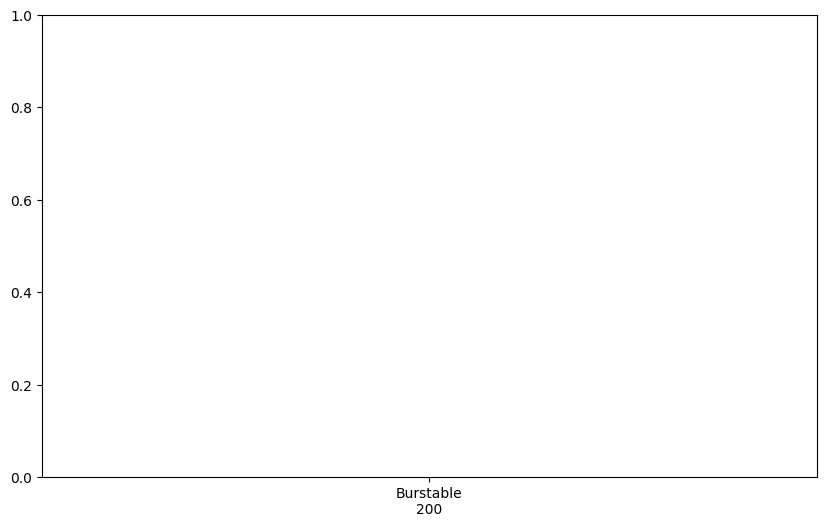

In [1]:
import matplotlib.pyplot as plt
import re

# Initialize data containers
latency_data = {'Burstable': [], 'NetMARKS': [], 'TraDE': []}
throughput_data = {'Burstable': [], 'NetMARKS': [], 'TraDE': []}

# Mapping of indices to methods
method_mapping = {0: 'Burstable', 1: 'NetMARKS', 2: 'TraDE'}

# Read and parse the file
with open('output_result2.txt', 'r') as file:
    content = file.read()

# Regular expressions to match the latency and throughput
latency_pattern = re.compile(r'Latency\s+([\d.]+)s')
throughput_pattern = re.compile(r'Requests/sec:\s+([\d.]+)')

# Split the content based on each test block
test_blocks = content.split('Running 2m test @ ')

for i, block in enumerate(test_blocks[1:], start=0):
    method = method_mapping[i % 3]  # Determine the method
    lat_match = latency_pattern.search(block)
    thr_match = throughput_pattern.search(block)
    
    if lat_match and thr_match:
        avg_latency = float(lat_match.group(1))
        req_per_sec = float(thr_match.group(1))
        
        latency_data[method].append(avg_latency)
        throughput_data[method].append(req_per_sec)

# Plotting the data
qps_values = [200, 500, 1000]

# Latency Bar Plot
plt.figure(figsize=(10, 6))
for method in latency_data:
    plt.bar([f"{method}\n{qps}" for qps in qps_values], latency_data[method], label=method)
plt.xlabel('Methods and QPS')
plt.ylabel('Latency (s)')
plt.title('Average Latency for Different Methods and QPS')
plt.legend()
plt.show()

# Throughput Bar Plot
plt.figure(figsize=(10, 6))
for method in throughput_data:
    plt.bar([f"{method}\n{qps}" for qps in qps_values], throughput_data[method], label=method)
plt.xlabel('Methods and QPS')
plt.ylabel('Throughput (Requests/sec)')
plt.title('Throughput for Different Methods and QPS')
plt.legend()
plt.show()
